# Detection DAPI

## Les installations (partie 1): 

In [ ]:
!pip install cellpose
!pip install numpy
!pip install matplotlib
!pip install pandas
# !pip uninstall torch

## Les installations (partie 2):

In [ ]:
!conda install pytorch cudatoolkit=10.2 -c pytorch
!pip install --no-deps cellpose --upgrade

## Les imports:

In [1]:
from tkinter import *
from tkinter.filedialog import askdirectory
from tkinter.filedialog import askopenfilename
import os
from math import sqrt
import re
import matplotlib.pyplot as plt
import glob 
import cv2 as cv # to open and view your image
import cellpose
from cellpose import utils, io, plot, models
from skimage.io import imread
from skimage import filters
import shutil

2022-02-08 16:22:42,390 [INFO] WRITING LOG OUTPUT TO C:\Users\silvinm\.cellpose\run.log


## Choose your path directory / Create a Result directory

In [2]:
root = Tk()
root.withdraw()

# =============================================================================
#Choose your path directory
# =============================================================================
path = askdirectory(title='Select Working Folder (where your image are)') # shows dialog box and return the path
print(path)
os.chdir(path)

pathResult = path+'/SegmentationDAPI'
if not os.path.exists(pathResult):
    os.makedirs(pathResult)
print(pathResult)

# =============================================================================
#Display files in the folder
# =============================================================================

list = os.listdir(path)
for fichiers in list:
    print(fichiers)

C:/Users/silvinm/Desktop/Faezeh_Detection_noyaux_measure_intensity/DAPI
C:/Users/silvinm/Desktop/Faezeh_Detection_noyaux_measure_intensity/DAPI/SegmentationDAPI
0.6.4
Auxin+PB_1.tif
Auxin+PB_2.tif
Auxin+PB_Stack_1.tif
Auxin_1.tif
Auxin_2.tif
Auxin_Stack__2.tif
Crtl+PB_1.tif
Crtl+PB_2.tif
Crtl+PB_Stack_1.tif
Crtl-1.tif
Crtl-2.tif
Crtl_Stack_1.tif
SegmentationDAPI


## Run detection and segmentation

In [ ]:
# =============================================================================
# Run Cellpose
# =============================================================================

model = models.Cellpose(gpu=False, model_type='cyto')


Impath = glob.glob(path+"/*.tif")
for img in Impath:
    image = imread(img)
    imgs = cv.imread(img,0)
    
    imageS = image.shape
    
    if len(imageS) > 3:
        print("Ne pas prendre en compte"+img)
    else:
    
        channel3 = image[:,:,2]

        GB_imgs = filters.gaussian(channel3, 2)
       # define CHANNELS to run segementation on
       # grayscale=0, R=1, G=2, B=3
       # channels = [cytoplasm, nucleus]
       # if NUCLEUS channel does not exist, set the second channel to 0
        channels = [0,0]

        # if diameter is set to None, the size of the cells is estimated on a per image basis
        # you can set the average cell `diameter` in pixels yourself (recommended)
        # diameter can be a list or a single number for all images

        masks, flows, styles, diams = model.eval(GB_imgs, diameter=70, channels=channels)
    #     masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)


        fig = plt.figure(figsize=(12,5))
        plot.show_segmentation(fig, GB_imgs, masks,flows[0],channels=channels)
        plt.tight_layout()
        plt.show()

        # image_name is file name of image
        # masks is numpy array of masks for image
        base = os.path.splitext(img)[0]
    #     outlines = utils.outlines_list(masks)
    #     io.outlines_to_text(base, outlines)
        io.save_to_png(imgs, masks, flows, img)
    

# =============================================================================
# Moving png and txt to a result folder
# =============================================================================    

# Move .png
pngpath = glob.glob(path+"/*.png")
for files in pngpath:
    shutil.move(files,pathResult)

    
# Move .txt
txtpath = glob.glob(path+"/*.txt")
for files in txtpath:
    shutil.move(files,pathResult)


In [ ]:
import pandas as pd

#plt.imshow(n)
    #io.imshow(n)
Roi= glob.glob(pathResult+"/*.txt")
df= pd.DataFrame(columns=['Name','Value'])   
    #for file in Roi:
nRes = []
ImgName = []
for file in Roi:
    n = len(open(file).readlines())
    n=str(n)
    completeName = os.path.join(pathResult, "Result"+".txt")
    if not os.path.isfile(completeName):
        f = open(completeName,'w')
        f.close()
    name=os.path.basename(file) 
    fichier = open(completeName, "a")
    fichier.write('\n'+name+':'+n)
    fichier.close()
    nRes.append(n)
    ImgName.append(name)

print(nRes)
print(ImgName)

In [ ]:
!pip install napari_simpleitk_image_processing

In [67]:
!pip install pyclesperanto-prototype

  Using cached pyclesperanto_prototype-0.14.0-py3-none-any.whl (510 kB)
  Using cached pyopencl-2021.2.13.tar.gz (452 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pyopencl
Failed to build pyopencl
    Running setup.py install for pyopencl: started
    Running setup.py install for pyopencl: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\silvinm\.conda\envs\cellpose\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\silvinm\\AppData\\Local\\Temp\\pip-install-9ll011qo\\pyopencl_4779330ea7cb4b518ba5619add74aacf\\setup.py'"'"'; __file__='"'"'C:\\Users\\silvinm\\AppData\\Local\\Temp\\pip-install-9ll011qo\\pyopencl_4779330ea7cb4b518ba5619add74aacf\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\silvinm\AppData\Local\Temp\pip-wheel-v2elyk3y'
       cwd: C:\Users\silvinm\AppData\Local\Temp\pip-install-9ll011qo\pyopencl_4779330ea7cb4b518ba5619add74aacf\
  Complete output (114 lines):
  ---------------------------------------------------------------------------
  Pybind11 

    to fix this. If you don't, the build will continue
    in a few seconds.
    
    [1] https://pybind11.readthedocs.io/en/stable/
    ---------------------------------------------------------------------------
    Continuing in 10 seconds...
    Continuing in 9 seconds...
    Continuing in 8 seconds...
    Continuing in 7 seconds...
    Continuing in 6 seconds...
    Continuing in 5 seconds...
    Continuing in 4 seconds...
    Continuing in 3 seconds...
    Continuing in 2 seconds...
    Continuing in 1 seconds...
    
    ---------------------------------------------------------------------------
    Mako is not installed.
    ---------------------------------------------------------------------------
    That is not a problem, as most of PyOpenCL will be just fine
    without it. Some higher-level parts of pyopencl (such as
    pyopencl.reduction) will not function without the templating engine
    Mako [1] being installed. If you would like this functionality to
    work, you mi

C:\Users\silvinm\.conda\envs\cellpose\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


AttributeError: 'AxesImage' object has no property 'labels'

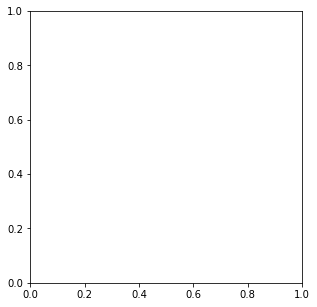

In [66]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from napari_simpleitk_image_processing import threshold_otsu, label_statistics
from skimage.filters import try_all_threshold, threshold_yen
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skimage.io
from skimage import measure


Impath = glob.glob(path+"/*.tif")
for img in Impath:
    image = skimage.io.imread(img)
    imgs = cv.imread(img,0)
    
    imageS = image.shape
    
    if len(imageS) > 3:
        print("Ne pas prendre en compte"+img)
    else:
        channel1 = image[:,:,0]
        plt.figure(figsize=(12,5))
#         plt.imshow(channel1)
        
#         fig, axs = plt.subplots(1, 4, figsize=(15,15))
#         axs[0].imshow(channel1)
#         axs[1].imshow(bilateral_filter(channel1))
#         axs[2].imshow(white_top_hat(channel1))
#         axs[3].imshow(h_maxima(channel1, height=10))
        
#         fig, ax = try_all_threshold(channel1, figsize=(10, 8), verbose=False)

        thresh = threshold_yen(channel1)
#         plt.imshow(thresh)
        
        binary_mask = channel1 > thresh
#         fig, ax = plt.subplots(ncols=2, figsize=(8, 2.5))
#         ax[1].imshow(binary_mask, cmap='gray')
#         ax[0].imshow(channel1)
#         plt.show()
        
        # apply the binary mask to select the foreground
#         selection = np.zeros_like(image)
#         selection[binary_mask] = image[binary_mask]

#         fig, ax = plt.subplots()
#         plt.imshow(selection)
#         plt.show()
        
        from skimage.measure import label
#         labeled_channel1 = label(binary_mask)
        label_image = measure.label(binary_mask)
        
#         Visualization
#         fig, axs = plt.subplots(1, 3, figsize=(15,15))

#         axs[0].imshow(channel1)
#         axs[1].imshow(binary_mask)
#         axs[2].imshow(labeled_channel1)
        imshow(label_image, labels = True)